# TE Image processing

Import the necessary modules and activate inline plotting.

In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [4]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')
    # place the x-axis labels at the top
    plt.tick_params(bottom=False, top=True, labelbottom=False, labeltop=True)

In [5]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(300, 300, 3)


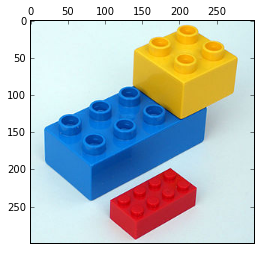

In [6]:
img = cv2.imread("bricks.jpg")
print(img.shape)
show(img)

What is the BGR value of pixle at position p0 = (100, 200)?

In [11]:
p0 = (200, 100)
(b,g,r)= img[200,100]
print('b=',b,'g=',g,'r=',r)

b= 149 g= 66 r= 4


Make a copy of `img` and add a red circle of with center=p0, radius=20, and thickness=2.

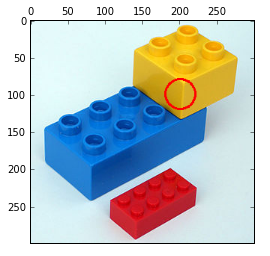

In [70]:
img2 = img.copy()
cv2.circle(img2,p0,20,(0,0,255),2)
show(img2)


## 7 Histograms

Transform the color image to a gray-scale image and show it.

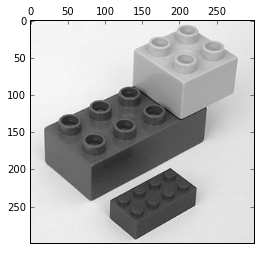

In [73]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a false-color image to better read the gray-scale values.

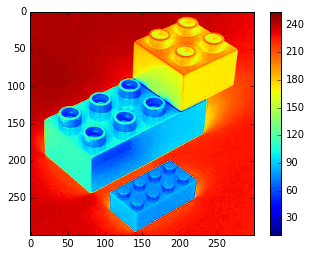

In [18]:
plot = plt.imshow(gray)
plt.colorbar();

Create a histogramm for the grayscale image `gray`.

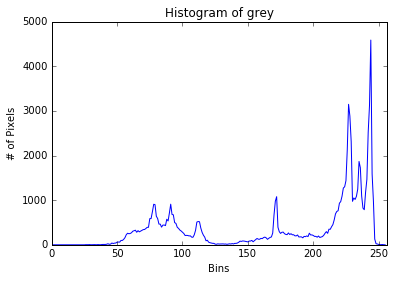

In [20]:
hist_gray= cv2.calcHist([gray],[0],None,[256],[0,256])

histogram(hist_gray,'Histogram of grey')

Look at the false-color grayscale image and explain the seven peaks at 
- 75  : le lego rouge
- 90  : le reste du lego bleu
- 110 : c'est la face à gauche du lego bleu
- 170 : c'est le lego jaune
- 220 : l'ombe des legos
- 230 : c'est l'arrière fond plutôt bas droite
- 240 : c'est l'arrière fond plutôt haut gauche

## Split into RGB colors

Split the image into its 3 color components (b, g, r). Show b.

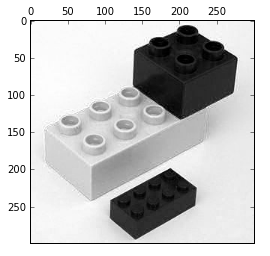

In [25]:
(b, g, r) = cv2.split(img)
show(b)

Horizontally stack the 3 images (b, g, r) and call the result `bgr`.

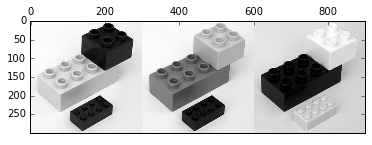

In [26]:
bgr=np.hstack([b,g,r])
show(bgr)

Create a zero-filled np.array `z` whith the same dimensions as `gray`. Use it to create a 
- blue imgage B from b
- green image G from g
- red image R from r

Horizontally stack the (B, G, R) images and call the result `BGR`.

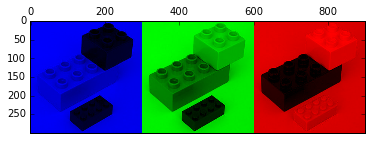

In [32]:
zeros = np.zeros(img.shape[:2], dtype = "uint8")
B = cv2.merge([b,zeros,zeros])
G=cv2.merge([zeros,g,zeros])
R=cv2.merge([zeros,zeros,r])

BGR = np.hstack([B,G,R])
show(BGR)

## 8 Smoothing

Extract a 80x80 region at point (100, 80) and call it `img2`

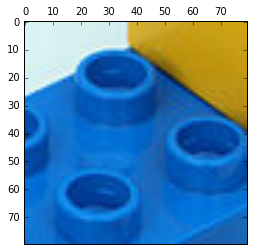

In [76]:
img2= img[80:80+80,100:100+80]
show(img2)

Show 3 horizontally stacked Gaussian blurred images of `img2` with a blur size of 3, 5, 7

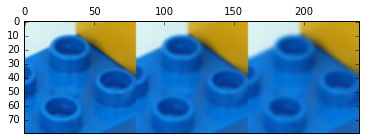

In [77]:
Gaus_3= cv2.GaussianBlur(img2,(3,3),0)
Gaus_5= cv2.GaussianBlur(img2,(5,5),0)
Gaus_7= cv2.GaussianBlur(img2,(7,7),0)

show(np.hstack([Gaus_3,Gaus_5,Gaus_7]))

## 9 Thresholding

Use the blue component `b` of the image and compute the inverse binary with a simple threshold of T=100, to obtain a mask which only shows the yellow and the red brick.

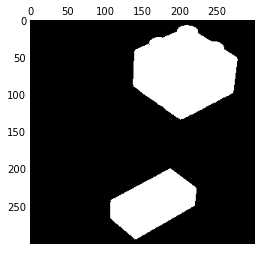

In [67]:
(T,thresh)= cv2.threshold(b,100,255,cv2.THRESH_BINARY_INV)

show(thresh)

Use `bitwise_and` to show only the red and yellow brick.

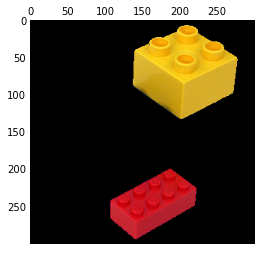

In [68]:
show(cv2.bitwise_and(img, img, mask =thresh))

## 10 Edge detection

The blue color component `b` has the higest image contrast. So we use this image for edge detection of the yellow and red brick.

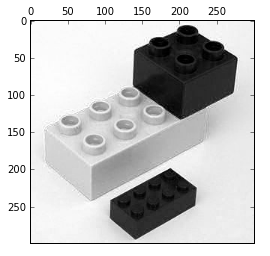

In [15]:
show(b)

Blur the grayscale image `b` by an appropriate amount, then use Canny edge detection to extract the contours of the red and yellow brick.

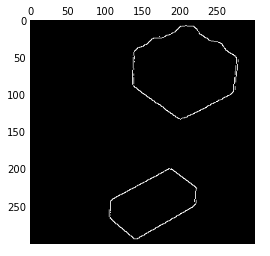

In [64]:
blur = cv2.blur(b, (5, 5))
canny = cv2.Canny(blur, 200, 250)
show(canny)